# Imports

In [40]:
# Common
import time
import os
import csv
import numpy as np

# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Image Processing
import cv2
from PIL import Image

# Constant

In [41]:
BASE_IMGS_PATH = '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1'

# Utils

In [59]:
def get_image_paths(directory, valid_extensions=(".jpg", ".jpeg", ".png", ".bmp", ".gif")):
    image_paths = []
    
    # Iterate over all files in the directory
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Check if file is an image based on its extension
            if file.lower().endswith(valid_extensions):
                # Append the full path of the image file to the list
                image_paths.append(os.path.join(root, file))
    
    return image_paths


def plot_image_grid(images, images_per_row=5, total_images=50):
    # Ensure we don't exceed the available images or the limit of 50
    total_images = min(total_images, len(images))
    
    # Calculate the number of rows needed
    num_rows = (total_images + images_per_row - 1) // images_per_row

    # Create a figure with a grid of subplots
    fig, axs = plt.subplots(num_rows, images_per_row, figsize=(15, 3 * num_rows))

    # Flatten the axes array in case of more than one row
    axs = axs.ravel()

    for i in range(total_images):
        # Read and display the image
        img = images[i]
        axs[i].imshow(img)
        axs[i].axis('off')  # Turn off the axis for clean presentation

    # Turn off any remaining unused subplots (if total_images < images_per_row * num_rows)
    for j in range(total_images, len(axs)):
        axs[j].axis('off')

    # Show the grid of images
    plt.tight_layout()
    plt.show()

    
def plt_img(image, cmap="gray"):
    """Display an image using matplotlib"""
    plt.imshow(image, cmap)
    plt.axis('on')
    plt.show()
    
    
def read_rgb_images(imgs_paths):
    images = []
    
    for path in imgs_paths:
        image = plt.imread(path)
        images.append(image)
    return images


def convert_rgb_to_his(rgb_imgs):
    data = []
    for rgb_img in rgb_imgs:
        # Convert image from BGR (OpenCV default) to RGB
        img_rgb = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)
        
        # Convert RGB to HSV
        img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
        
        # Append data
        data.append(img_hsv)
    return np.array(data)


def convert_rgb_to_lab(rgb_imgs):
    data = []
    for rgb_img in rgb_imgs:
        # Convert image from BGR (OpenCV default) to RGB
        img_rgb = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)
        
        # Convert RGB to Lab
        img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2Lab)
        
        # Append data
        data.append(img_lab)
    return np.array(data)


def convert_rgb_to_ycrcb(rgb_imgs):
    data = []
    for rgb_img in rgb_imgs:
        # Convert image from BGR (OpenCV default) to YCrCb
        img_ycrcb = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2YCrCb)
        
        # Append data
        data.append(img_ycrcb)
    return np.array(data)


def apply_canny_edge(images, low_threshold=50, high_threshold=150):
    data = []
    for img in images:
        # Convert image to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Apply Canny edge detector
        edges = cv2.Canny(gray_img, low_threshold, high_threshold)
        
        # Append data
        data.append(edges)
    return data


# Step1: Read Images

In [43]:
image_paths = get_image_paths(BASE_IMGS_PATH)

# Step2: Visualize Images

In [44]:
rgb_imgs = read_rgb_images(image_paths[:5])

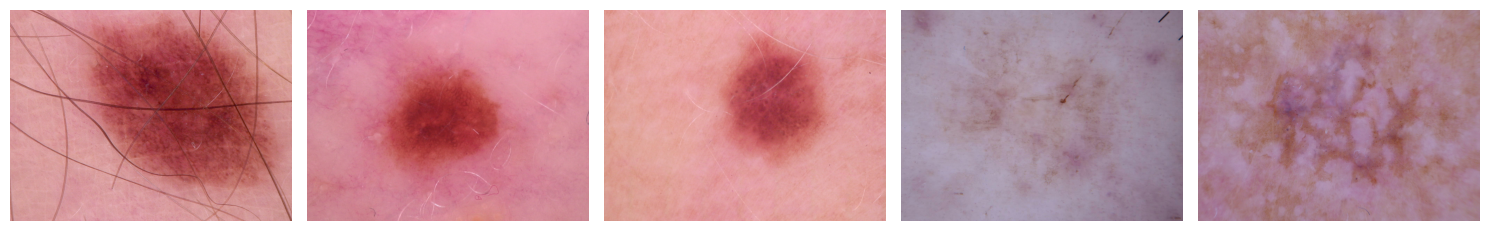

In [45]:
plot_image_grid(rgb_imgs)

# Step3: Convert RGB To HSI

In [46]:
his_imgs = convert_rgb_to_his(rgb_imgs)

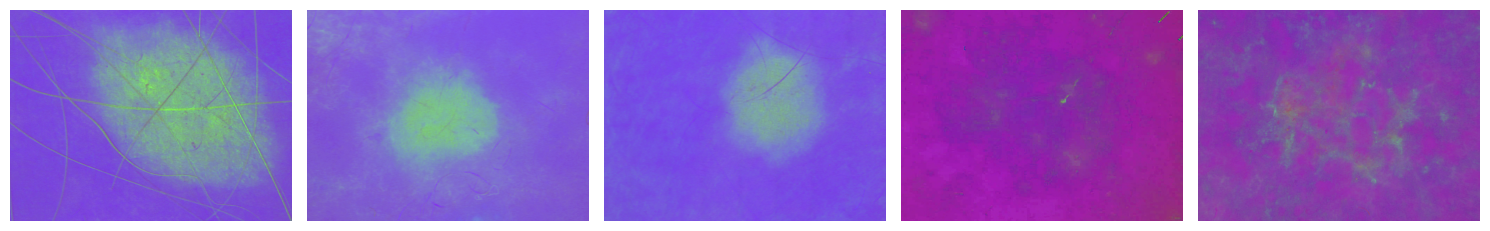

In [47]:
plot_image_grid(his_imgs)

# Step4: Convert RGB To LAB

In [48]:
lab_imgs = convert_rgb_to_lab(rgb_imgs)

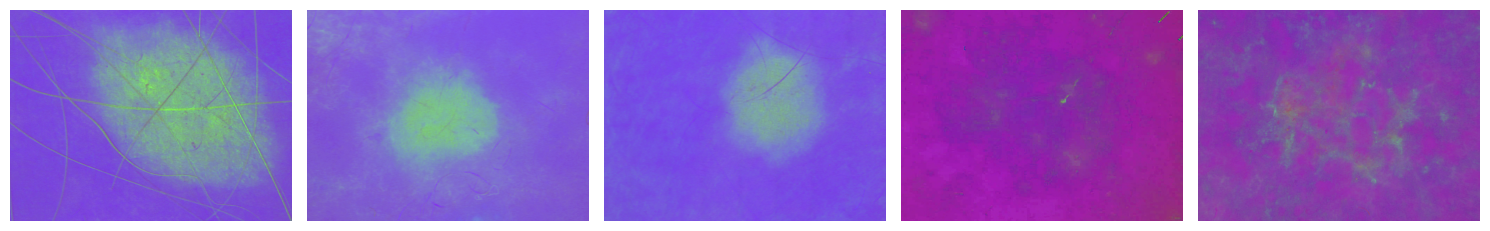

In [49]:
plot_image_grid(his_imgs)

# Step5: Convert RGB To YCRCB

In [50]:
ycrcb_imgs = convert_rgb_to_ycrcb(rgb_imgs)

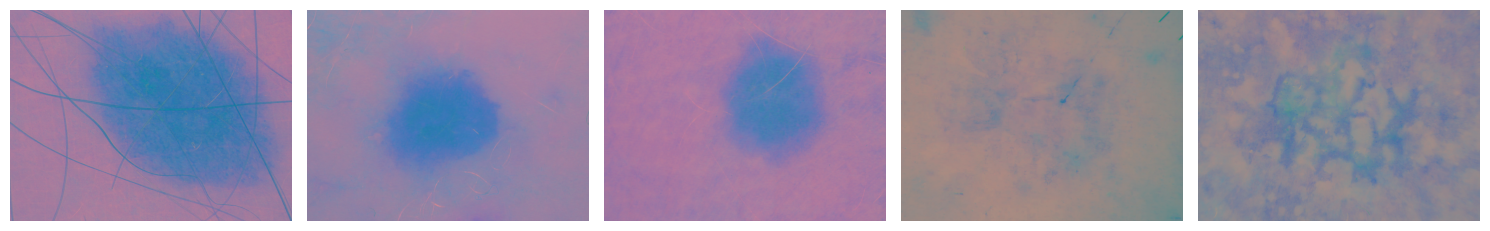

In [51]:
plot_image_grid(ycrcb_imgs)